In [ ]:
!pip install plotly --upgrade

     |████████████████████████████████| 20.6MB 1.4MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
#Importando as bibliotecas de visualização, temos:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

**Base de dados plano de saúde**

In [ ]:
#importando a base de dados, temos:
base_plano_saude = pd.read_csv('/content/plano_saude.csv')

In [ ]:
#observando os dados, temos:
base_plano_saude

,idade,custo
0,18,871
1,23,1132
2,28,1242
3,33,1356
4,38,1488
5,43,1638
6,48,2130
7,53,2454
8,58,3066
9,63,4090


In [ ]:
#Nosso objetivo é construir um modelo de regressão para prever o custo a partir da idade.
#separando a nossa base de dados em atributos previsores (x) e atributos respostas (y), temos:
#o método .values converte os dados para o formato numpy array
x_plano = base_plano_saude.iloc[:,0].values

In [ ]:
x_plano

array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63])

In [ ]:
y_plano = base_plano_saude.iloc[:,1].values

In [ ]:
y_plano

array([ 871, 1132, 1242, 1356, 1488, 1638, 2130, 2454, 3066, 4090])

In [ ]:
#O coeficiente de correlação é utilizado para medir a relação entre a variável dependente e as variáveis independentes
#O coeficiente de correlação assume valores entre 1 e -1. Quando está próximo de 1 ou -1 significa que a correlação
#é forte, ou seja, os valores objetivo podem ser explicados pelas variáveis explanatórias. Se o coeficiente estiver
#próximo de 0, significa que não há correlação entre as variáveis.
#Logo, podemos interpretar os valores da seguinte forma:
#1: correlação positiva perfeita entre os dados;
#-1: correlação negativa perfeita entre os dados;
#0: não há correlação entre os dados;
#próximo de 1: correlação positiva forte entre os dados;
#próximo de -1: correlação negativa forte entre os dados;
#próximo de 0: correlação fraca entre os dados.
#Calculando o coeficiente de correlação, temos:
np.corrcoef(x_plano,y_plano)

array([[1.        , 0.93091958],
       [0.93091958, 1.        ]])

In [ ]:
#Observe que a variável x_plano tem apenas uma dimensão, ou seja, apenas um vetor. Para aplicar no algoritmo
#de regressão linear, precisamos converter os dados de vetor para matriz usando o método '.reshape(-1,1)'
x_plano.shape

(10,)

In [ ]:
x_plano = x_plano.reshape(-1,1)

In [ ]:
x_plano.shape

(10, 1)

In [ ]:
y_plano

array([ 871, 1132, 1242, 1356, 1488, 1638, 2130, 2454, 3066, 4090])

In [ ]:
x_plano

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

In [ ]:
#Aplicando o algoritmo de aprendizado de máquina de regressão linear, temos:
from sklearn.linear_model import LinearRegression
regressor_plano = LinearRegression()
regressor_plano.fit(x_plano,y_plano)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
previsoes = regressor_plano.predict(x_plano)

In [ ]:
previsoes

array([ 554.67272727,  864.01212121, 1173.35151515, 1482.69090909,
       1792.03030303, 2101.36969697, 2410.70909091, 2720.04848485,
       3029.38787879, 3338.72727273])

In [ ]:
#exibe o parâmetro b0 de interceptação da reta com o eixo y
regressor_plano.intercept_

-558.9490909090912

In [ ]:
#exibe o parâmetro b1 de inclinação da reta
regressor_plano.coef_

array([61.86787879])

In [ ]:
#Para exibir o gráfico precisamos converter os dados da variável x_plano da forma de matriz para vetor novamente
#Fazemos essa conversão usando o método ".ravel()"

In [ ]:
x_plano = x_plano.ravel()

In [ ]:
x_plano

array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63])

In [ ]:
x_plano.shape

(10,)

In [ ]:
#o comando scatter exibe um gráfico de dispersão dos dados.
grafico = px.scatter(x = x_plano.ravel(), y = y_plano) #plota os dados originais da base de dados
grafico.add_scatter(x = x_plano.ravel(),y = previsoes,name='Regressão')
grafico.show()

In [ ]:
#Podemos fazer qualquer previsão, basta adicionar um valor na forma de matriz. Um valor unitário deverá ter
#o seguinte formato: [[valor numérico]]
#Para valor valores, temos o seguinte formato: [[valor numérico],[valor numerico],[...]]
regressor_plano.predict([[40],[50],[100]])

array([1915.76606061, 2534.44484848, 5627.83878788])

In [ ]:
regressor_plano.predict([[40]])

array([1915.76606061])

In [ ]:
regressor_plano.predict([[50]])

array([2534.44484848])

In [ ]:
#Podemos usar o método ".score(x,y)" para verificar a qualidade do algoritmo.
regressor_plano.score(x_plano.reshape(-1,1),y_plano)

0.8666112727879174

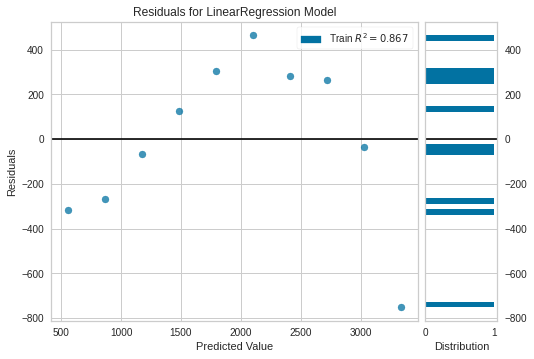

In [ ]:
#Podemos visualizar as distâncias entre os valores dos dados originais e a reta de regessão criada pelo algoritmo
#Lembrando que essa distância é chamada de erro (resíduo), daí o nome da função "ResidualsPlot"
from yellowbrick.regressor import ResidualsPlot
visualizador = ResidualsPlot(regressor_plano)
visualizador.fit(x_plano.reshape(-1,1),y_plano)
visualizador.poof()

**Base preço de casas**

In [ ]:
#abrindo a base de dados de preços, temos:
house_prices = pd.read_csv('/content/house_prices.csv')

In [ ]:
house_prices

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
house_prices.shape

(21613, 21)

In [ ]:
#verificando se há valores faltantes, temos:
house_prices.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
#Calculando a correlação entre os atributos, temos:
#Note que temos 21 atributos, esse método irá cruzar os atributos e verificar a correlação entre eles.
house_prices.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


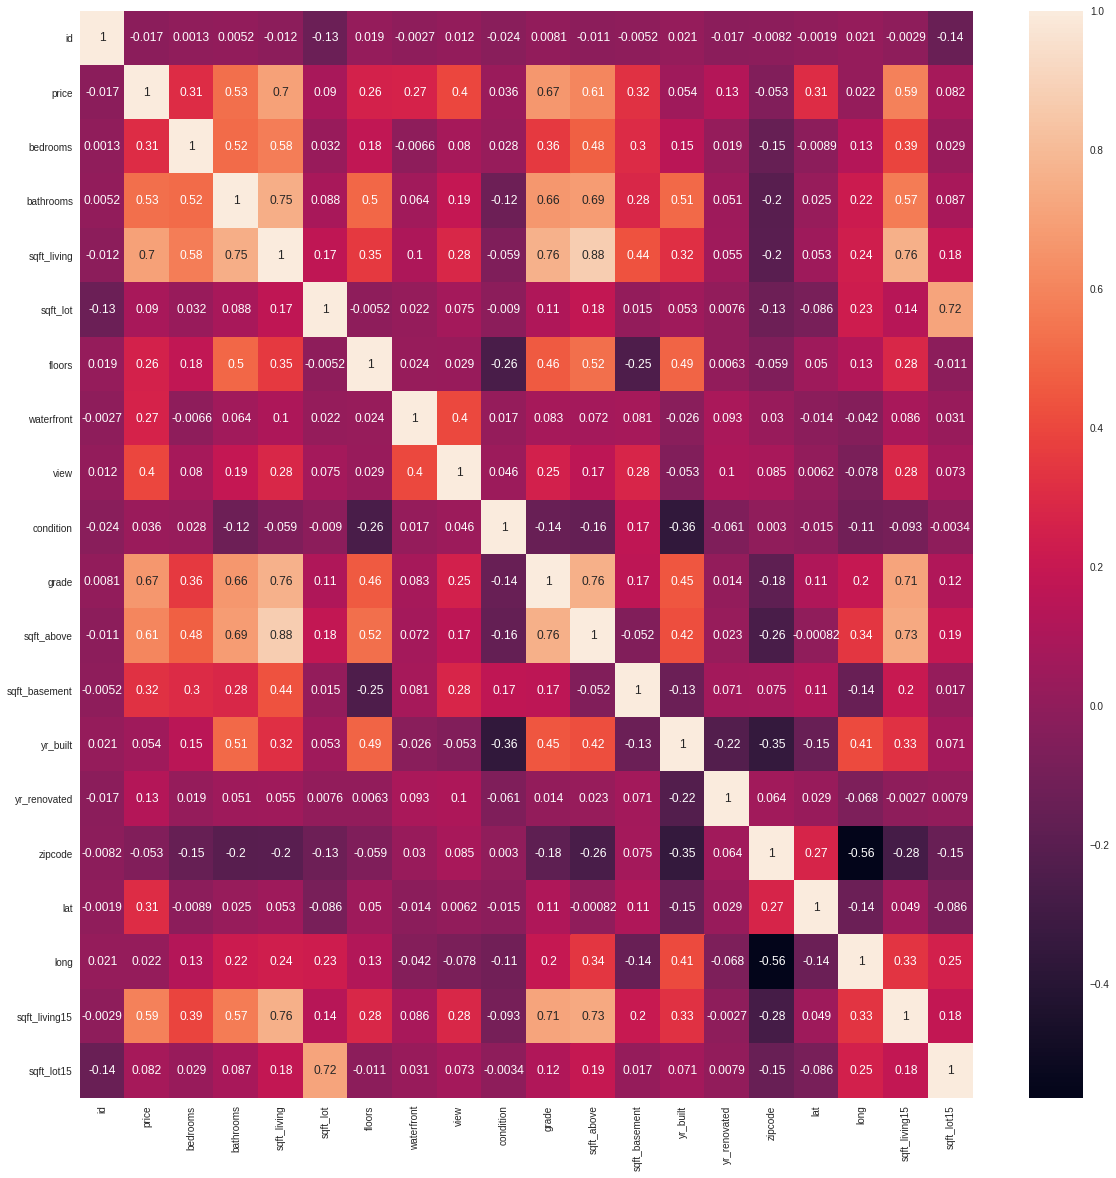

In [ ]:
#Podemo obter uma visualização melhor dos dados de correlação usando mapa de calor do seaborn:
figura = plt.figure(figsize=(20,20))
sns.heatmap(house_prices.corr(), annot = True)

In [ ]:
#Após observar o mapa de calor, podemos perceber que há uma forte correlação entre o preço da casa 
# e a área da casa (em metros quadrados). Logo, vamos separar os atributos preço (resposta) e sqft_living (explanatória)
x_casa = house_prices.iloc[:,5].values
x_casa

array([1180, 2570,  770, ..., 1020, 1600, 1020])

In [ ]:
y_casa = house_prices.iloc[:,2].values
y_casa

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [ ]:
#Neste momento queremos criar um algoritmo de aprendizado de máquina de regressão linear para prever
#os preços das casas a partir da área construída. Para isso, primeiramente dividimos a base de dados
#em base de treinamento e base de teste.
from sklearn.model_selection import train_test_split
x_casa_treinamento, x_casa_teste, y_casa_treinamento, y_casa_teste = train_test_split(x_casa, y_casa,test_size=0.3, random_state = 0)

In [ ]:
x_casa_treinamento.shape, x_casa_teste.shape

((15129,), (6484,))

In [ ]:
y_casa_treinamento.shape, y_casa_teste.shape

((15129,), (6484,))

In [ ]:
from sklearn.linear_model import LinearRegression
regressor_casa = LinearRegression()
regressor_casa.fit(x_casa_treinamento.reshape(-1,1),y_casa_treinamento)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
previsoes = regressor_casa.predict(x_casa_teste.reshape(-1,1))

In [ ]:
previsoes

array([ 360116.30871034, 1261900.99358095,  362899.59477476, ...,
        560512.90534826,  374032.73903242,  329500.16200177])

In [ ]:
#Obtendo o coeficiente de inclinação b1
regressor_casa.coef_

array([278.32860644])

In [ ]:
#obtendo o coeficiente de interceptação com o eixo y
regressor_casa.intercept_

-37893.59850106726

In [ ]:
# medindo o quanto a reta de regessao se ajusta aos dados
regressor_casa.score(x_casa_treinamento.reshape(-1,1),y_casa_treinamento)

0.49453356717789776

In [ ]:
#medindo o quanto a reta de regressao se ajusta aos dados
regressor_casa.score(x_casa_teste.reshape(-1,1),y_casa_teste)

0.4888992901945303

In [ ]:
grafico = px.scatter(x = x_casa_teste, y=y_casa_teste)
grafico.add_scatter(x = x_casa_teste, y = previsoes)
grafico.show()